In [3]:
import numpy as np
from numpy import cos
import matplotlib.pyplot as plt
%matplotlib inline

## Задача №3.1

Хомутов Евгений, БПМ-151

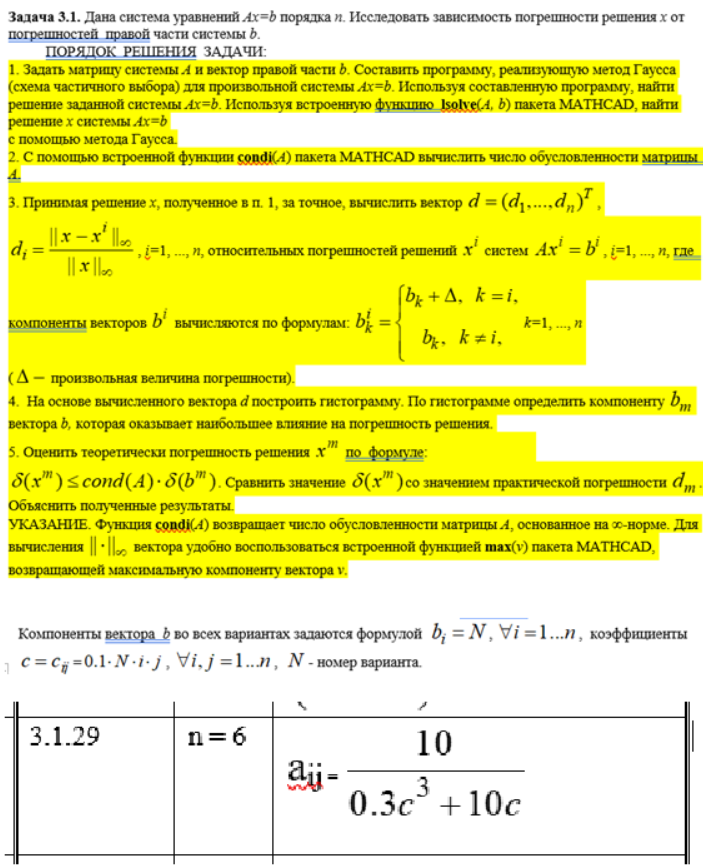

Данные задачи:

In [4]:
N = 3.29
epsilon = 10**(-5)

def c(i, j):
    return 0.1*N*i*j

def a(i, j):
    return float(10/(0.3*c(i,j)**3+10*c(i,j)))

In [5]:
A = np.array([[a(i, j) for i in range(1, 7)] for j in range(1, 7)])
print(A)
print(np.shape(A))

[[ 3.02967562  1.50026995  0.98440201  0.72234832  0.56225819  0.45356387]
 [ 1.50026995  0.72234832  0.45356387  0.31456538  0.22944523  0.17258968]
 [ 0.98440201  0.45356387  0.26739263  0.17258968  0.1170872   0.08228725]
 [ 0.72234832  0.31456538  0.17258968  0.10373535  0.06610823  0.04412145]
 [ 0.56225819  0.22944523  0.1170872   0.06610823  0.04013197  0.02582969]
 [ 0.45356387  0.17258968  0.08228725  0.04412145  0.02582969  0.0162105 ]]
(6, 6)


In [6]:
b = np.array([N for i in range(6)])
print(b)

[ 3.29  3.29  3.29  3.29  3.29  3.29]


Определим метод Гаусса через прямой и обратный ход

In [7]:
def Gauss(matrix, right):
    A = np.copy(matrix)
    b = np.copy(right)
    n = len(A)
    
    if (n != len(b)) and (np.shape(A)[0] != np.shape(A)[1]):
        print("У меня лапки, ничего не могу")
        return 0
    #Forward
    for i in range(n - 1):
        for j in range(i + 1, n):
            mu = A[j, i]/A[i, i]
            A[j] -= A[i]*mu
            b[j] -= b[i]*mu
    
    #Backward
    for i in range(n - 1, 0, -1):
        for j in range(i - 1, -1, -1):
            mu = A[j, i]/A[i, i]
            A[j] -= A[i]*mu
            b[j] -= b[i]*mu

    return np.array([b[i]/A[i, i] for i in range(n)])

Найдем ответ нашим Гауссом:

In [8]:
sol = Gauss(A, b)
sol

array([  48.70542219, -230.40915624,  526.68541417, -845.63333472,
        773.68974462, -311.39485309])

Число обусловленности:

In [9]:
cond = np.linalg.cond(A, p=np.inf)
cond

1664604.6582489754

Определим функцию для построение вектора d:

In [10]:
def DeltaVector(matrix, right, delta, solution):
    A = np.copy(matrix)
    b = np.copy(right)
    n = len(A)
    d = np.zeros(n)
    db = np.zeros(n)
    
    for i in range(n):
        bi = np.copy(b)
        bi[i] = bi[i] + delta
        xi = Gauss(A, bi)
        
        d[i] = np.linalg.norm(solution - xi, ord=np.inf) / np.linalg.norm(solution, ord=np.inf)
        db[i] = np.linalg.norm(b - bi, ord=np.inf) / np.linalg.norm(b, ord=np.inf)
    
    return d,db

In [11]:
d,db = DeltaVector(A, b, epsilon, sol)
print(d)
print(db)

[  1.85724267e-05   1.63844184e-04   5.47661267e-04   9.29352445e-04
   7.90026430e-04   2.65417976e-04]
[  3.03951368e-06   3.03951368e-06   3.03951368e-06   3.03951368e-06
   3.03951368e-06   3.03951368e-06]


Посторим гистограмму вектора d:

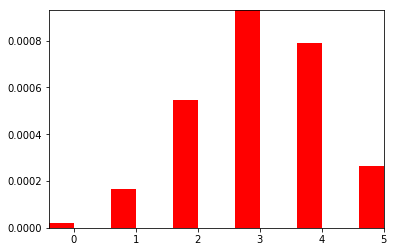

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.array(range(6))

ax.bar(x - 0.2, d, width=0.4,color='r',align='center')
ax.autoscale(tight=True)

plt.show()

Больше всего на погрешность влияет третья компонента.

Сравним теоритическую и реальную погрешность

In [13]:
dx = db*cond
print(dx)
print(d)

[ 5.05958863  5.05958863  5.05958863  5.05958863  5.05958863  5.05958863]
[  1.85724267e-05   1.63844184e-04   5.47661267e-04   9.29352445e-04
   7.90026430e-04   2.65417976e-04]


Реальная погрешность вышла меньше из-за большого числа обусловленности матрицы